# Introduction to neural netweok regression 


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

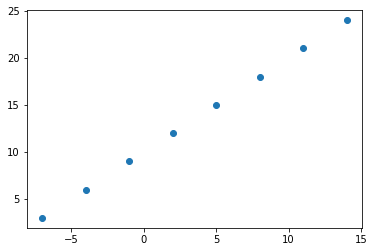

In [2]:
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
plt.scatter(X,y)

In [3]:
y==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Creating a model

In [4]:

X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)

# Set Random seed
tf.random.set_seed(42)

# Create a model using Sequential API
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)
])

# Complie the model
model.compile(
    loss=tf.keras.losses.mae, #MAE=Mean absolute error
    optimizer=tf.keras.optimizers.SGD(), #SGD= Schotastic Gradient Descent
    metrics=["mae"]
)

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 841ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 20ms/step - loss: 10.9748 - mae: 10.9748


In [5]:
# check X,y
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
# Check prediction using our model
y_pred=model.predict([17.0])
y_pred+11

array([[23.71602]], dtype=float32)

## Improving our model

In [7]:
# Set Random seed
tf.random.set_seed(42)

# Create a model using Sequential API
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(50, activation=None),
                           tf.keras.layers.Dense(1)
])

# Complie the model
model.compile(
    loss=tf.keras.losses.mae, #MAE=Mean absolute error
    optimizer=tf.keras.optimizers.Adam(lr=0.01), #SGD= Schotastic Gradient Descent
    metrics=["mae"]
)

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 695ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.5071 - mae: 12.5071
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.8279 - mae: 11.8279
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 11.1425 - mae: 11.1425
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.4485 - mae: 10.4485
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 9.7427 - mae: 9.7427
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.0218 - mae: 9.0218
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 8.2826 - mae: 8.2826
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 7.5221 - mae: 7.5221
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.7841 - mae: 6.7841
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss: 6.75

In [8]:
y_pred=model.predict([17.0])
y_pred

array([[27.216782]], dtype=float32)

### Common ways to improve a deep learning model
+ Adding a layer
+ Increase the number of hidden units
+ Change the number of activation function
+ **Change the learning rate!**
+ Fitting for longer

## Evaluating a model

In [9]:
X=tf.range(-100,100,4)
y=X+10 
len(X)

50

In [10]:
# Split the data into train and test sets
X_train=X[:40]
y_train=y[:40]
X_test=X[40:]
y_test=y[40:]
len(X_train),len(X_test), len(y_train),len(y_test)

(40, 10, 40, 10)

### Visualizing data

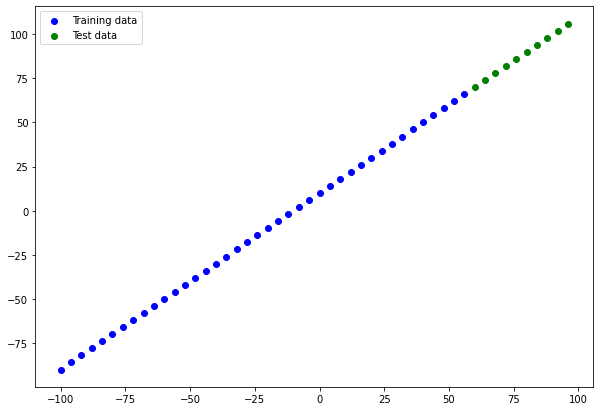

In [11]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training data")
# Plot test data in green
plt.scatter(X_test,y_test,c="g",label="Test data")
#Show a legend
plt.legend();

In [12]:
#Creating a neural network for uour data
# Create a model
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(1)])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)
# Fit the model for the training data
# model.fit(X_train,y_train,epochs=100)



### Visualizing a model

In [13]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [14]:
#Creating a neural network for uour data
# Create a model
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(10,input_shape=[1]),
                           tf.keras.layers.Dense(1,name="output_layer")],name="model_1"
                           )

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model.summary()
# Fit the model for the training data
# model.fit(X_train,y_train,epochs=100)



Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.fit(X_train,y_train, epochs=100, verbose=0)

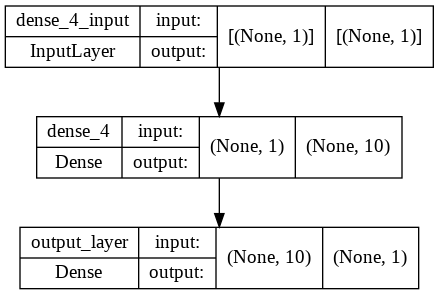

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our model

In [17]:
y_pred=model.predict(X_test)
y_pred


array([[ 75.978065],
       [ 80.92622 ],
       [ 85.87439 ],
       [ 90.82255 ],
       [ 95.77071 ],
       [100.718864],
       [105.66703 ],
       [110.61519 ],
       [115.563354],
       [120.51152 ]], dtype=float32)

In [18]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

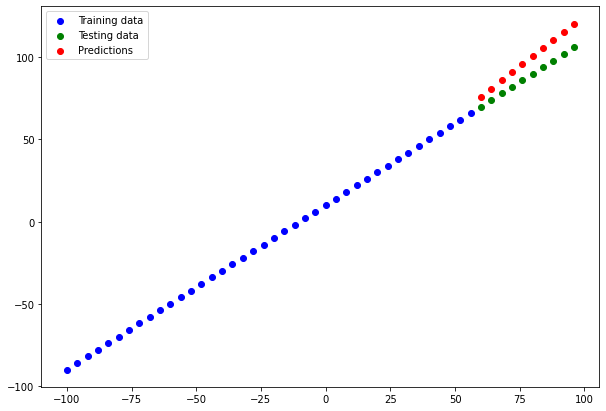

In [19]:
# Plotting function
def plot_predictions(
    train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred
):
  """Plots teaining data, test data and compares predictions to grounnd truth"""
  plt.figure(figsize=(10,7))
  # Training data in Blue
  plt.scatter(train_data, train_labels,c="b", label="Training data")
  #plot testing data in green
  plt.scatter(test_data,test_labels,c="g", label="Testing data")
  #Plot models predictions in red
  plt.scatter(test_data, predictions, c="r",label="Predictions")

  #Legend
  plt.legend()

plot_predictions(train_data=X_train,
    train_labels=y_train,
    test_data=X_test,
    test_labels=y_test,
    predictions=y_pred)


### Evaluating our models prediction with regression evaluation metrics

In [20]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 151ms/step - loss: 10.2448 - mae: 10.2448


[10.244787216186523, 10.244787216186523]

In [21]:
# Calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([13.613161 , 11.22951  , 10.025122 , 10.16451  , 11.5082855,
       14.031319 , 17.733624 , 22.615189 , 27.563354 , 32.51152  ],
      dtype=float32)>

In [22]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 75.978065],
       [ 80.92622 ],
       [ 85.87439 ],
       [ 90.82255 ],
       [ 95.77071 ],
       [100.718864],
       [105.66703 ],
       [110.61519 ],
       [115.563354],
       [120.51152 ]], dtype=float32)>

In [23]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [24]:
tf.squeeze(y_pred)
#Calculate the mean absolute error
mae=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.24479>

In [25]:
# Calculate mean squared error
mse=tf.metrics.mean_absolute_error(y_true=y_test,
                                   y_pred=tf.squeeze(y_pred))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=10.24479>

In [26]:
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true,tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true,tf.squeeze(y_pred))

### Running experiments to improve our model

model_1: same as og model_1, 1 layer, 100 trained for 100 epochs
model_2: 2 layers, 100 epochs
model_3: 2 laters, trained for 100 500 epochs

In [27]:
# Training data
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [28]:
## Build model_1
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)
# model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 17ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 17ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 13ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 16ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 16ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 18ms/

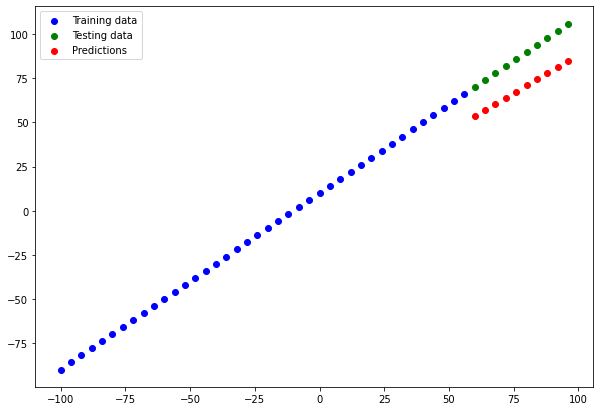

In [29]:
# Make and plot predictions for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [30]:
# Calculate model_1 evaluation metrics
mae_1=mae(y_test, y_preds_1)
mse_1=mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [31]:
## Build model_2
tf.random.set_seed(42)

model_2=tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1),
])

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)
# model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 27.4058 - mse: 1084.1482
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mse: 777.9203
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mse: 1334.8955
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4055 - mse: 1106.8035
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 14.9463 - mse: 281.1077
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8819 - mse: 168.6621
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 11.1988 - mse: 151.3509
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 11.0910 - mse: 160.3745
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mse: 2586.0090
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 27.8688 - mse: 1094.4382
Epoch 11/100
2/2 [========================

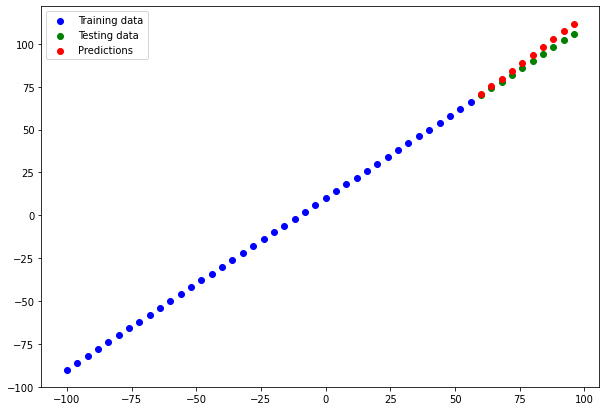

In [32]:
# Make an plot preds of model_2
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [33]:
# Calculate evaluation metric
# Calculate model_1 evaluation metrics
mae_2=mae(y_test, y_preds_2)
mse_2=mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.070143>)

In [34]:
## Build model_3
tf.random.set_seed(42)

model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1),
])

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"]
)

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)
# model_1.fit(X_train,y_train,epochs=100)

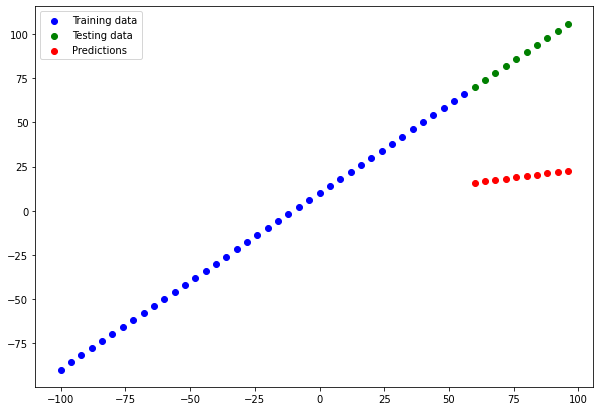

In [35]:
# Make an plot preds of model_3
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [36]:
# Calculate evaluation metric
# Calculate model_1 evaluation metrics
mae_3=mae(y_test, y_preds_3)
mse_3=mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.713615>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4808.0273>)

### Comparing the results

In [37]:
import pandas as pd

model_results=[["model_1", mae_1.numpy(),mse_1.numpy()],
               ["model_2", mae_2.numpy(),mse_2.numpy()],
               ["model_3", mae_3.numpy(),mse_3.numpy()]]
all_results=pd.DataFrame(model_results, columns=["Model","mae", "mse"])         
all_results

,Model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [38]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 10)                20        
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


## Saving our model
+ SavedModel Format
+ HDF5 format


## A Larger model

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [43]:
# One hot encoding dataframe 
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [54]:
# Create x & y vars (features and labels)
X=insurance_one_hot.drop("charges",axis=1)
y=insurance_one_hot["charges"]
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [48]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [57]:
# create training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [53]:
# Build a newral network

tf.random.set_seed(42)

insurance_model=tf.keras.Sequential([
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1),
])

insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

insurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
insurance_model.evaluate(X_test,y_test)


### Improving our insurance model

In [62]:
tf.random.set_seed(42)

insurance_model_2=tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1),
])

insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

insurance_model_2.fit(X_train,y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 7409.0811 - mae:

In [63]:
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [64]:
tf.random.set_seed(42)

insurance_model_3=tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1),
])

insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history=insurance_model_3.fit(X_train,y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [65]:
insurance_model_3.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3491.2961 - mae: 3491.2961


[3491.296142578125, 3491.296142578125]

Text(0.5, 0, 'epochs')

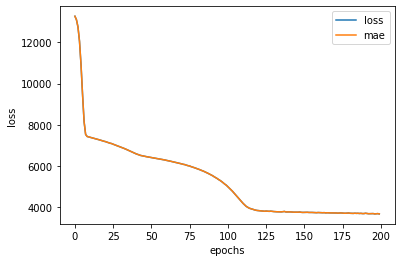

In [66]:
# Plot history (also known as loss curve or training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing data (normalization and standardization)

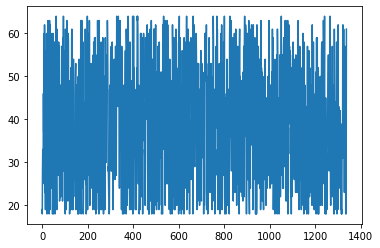

In [72]:
X["age"].plot()

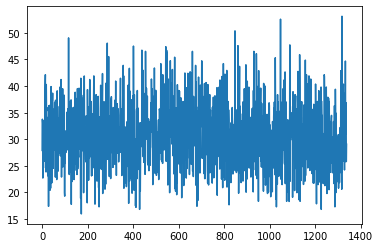

In [74]:
X["bmi"].plot()

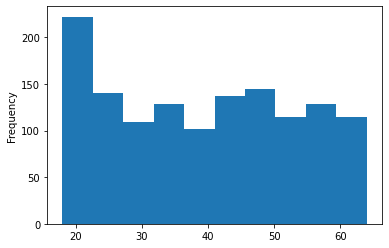

In [75]:
X["age"].plot(kind="hist")

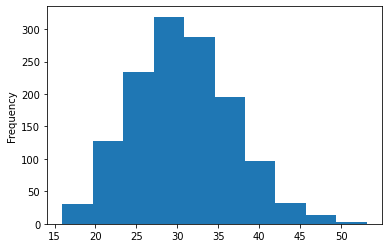

In [76]:
X["bmi"].plot(kind="hist")

In [77]:
# Normalization

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

insurance=pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [91]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer

ct=make_column_transformer(
    (MinMaxScaler(),["age","bmi","children"]),
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create x & y vars (features and labels)
X=insurance.drop("charges",axis=1)
y=insurance["charges"]

# create training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

# Fit the column transformer to tour training data
ct.fit(X_train)

# # Trannsform training and test data with normalization (MinMaxScaler and OneHotEncoder)
X_train_normal=ct.transform(X_train)
X_test_normal=ct.transform(X_test)

In [93]:
# What does the data look  like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [97]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [96]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

### Build a neural network based on new normalized data

In [98]:
tf.random.set_seed(42)

insurance_model_4=tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1),
])

insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history=insurance_model_4.fit(X_train_normal,y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 11925.96

In [103]:
insurance_model_4.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3171.5771 - mae: 3171.5771


[3171.5771484375, 3171.5771484375]

Text(0.5, 0, 'epochs')

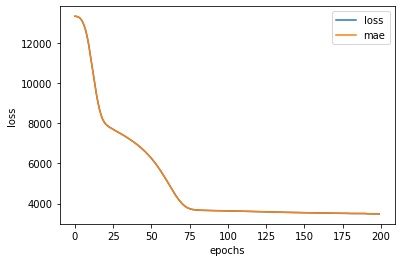

In [104]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")